**FINC 405 RESEARCH PROJECT**
**BY DALIA POBLANO**

**RESEARCH QUESTION: WHICH LIFESTYLE HABITS MOST STRONGLY PREDICT SLEEP QUALITY?**

In [47]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Uploading Dataset
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (2).csv


In [49]:
# Setting up Dataset
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])   # loads the first uploaded file automatically
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [50]:
# Exploring the dataset's info and checking for missing values
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None

Missing values:


In [51]:
# Cleaning Dataset's Missing Values in "Sleep Disorder" column
df = df.drop(columns=['Sleep Disorder'])

In [52]:
# Looking at the Shape of the Dataset
df.shape

(374, 12)

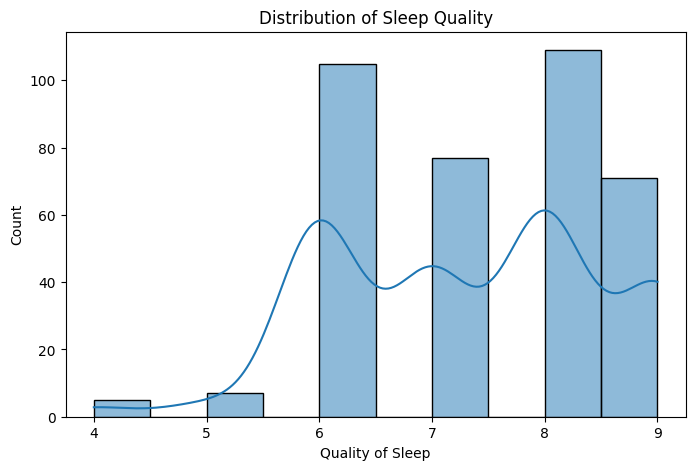

In [53]:
# Exploratory Data Analysis (EDA)

# Looking at the Distribution of Sleep Quality
plt.figure(figsize=(8,5))
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title("Distribution of Sleep Quality")
plt.show()

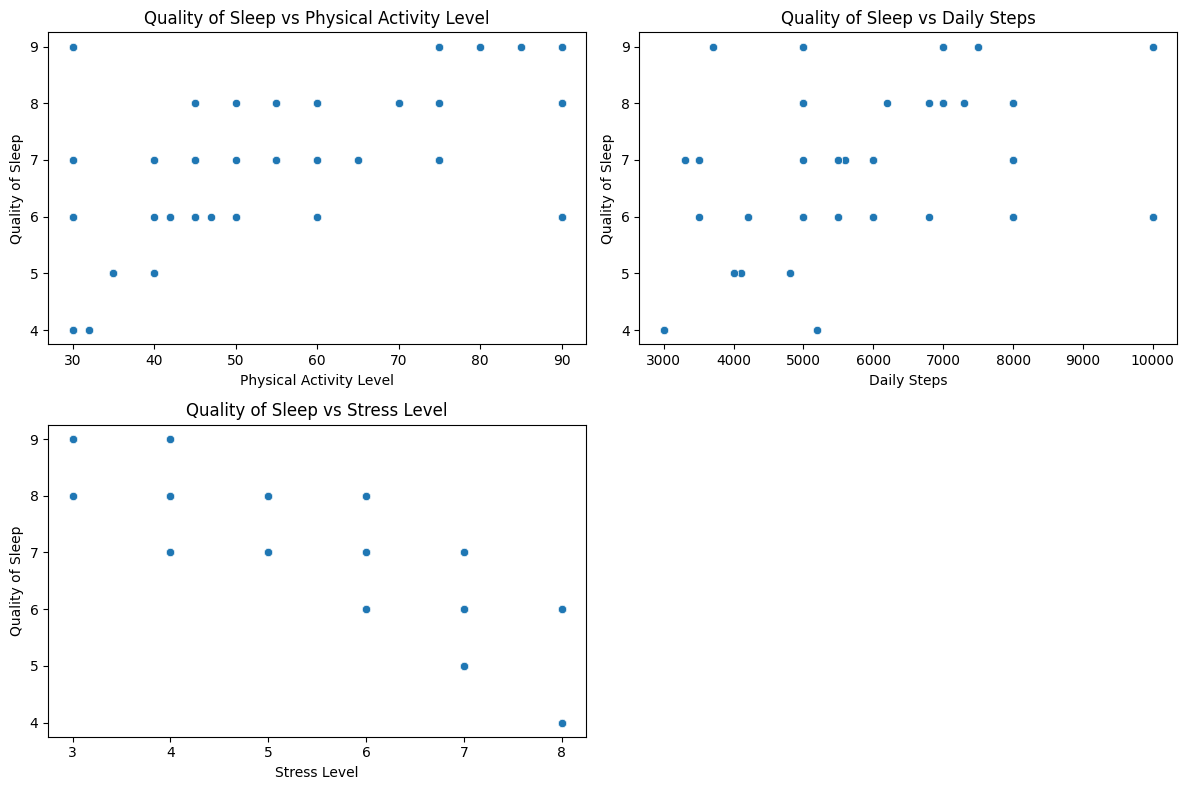

In [54]:
# Behavioral Lifestyle Habits
habits = ['Physical Activity Level', 'Daily Steps', 'Stress Level']

plt.figure(figsize=(12,8))
for i, col in enumerate(habits, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Quality of Sleep')
    plt.title(f"Quality of Sleep vs {col}")

plt.tight_layout()
plt.show()

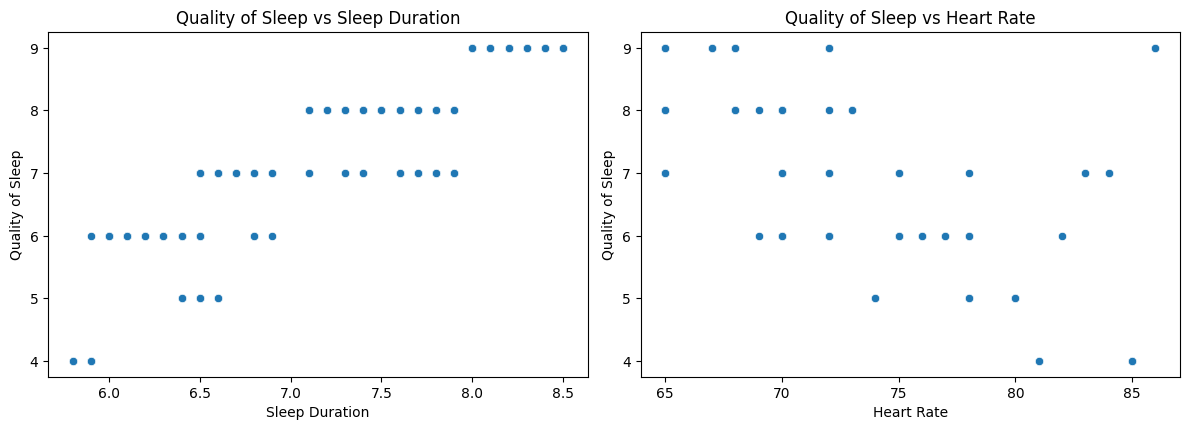

In [55]:
# Physiological or Health Indicators
habits = ['Sleep Duration', 'Heart Rate']


plt.figure(figsize=(12,8))
for i, col in enumerate(habits, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Quality of Sleep')
    plt.title(f"Quality of Sleep vs {col}")

plt.tight_layout()
plt.show()

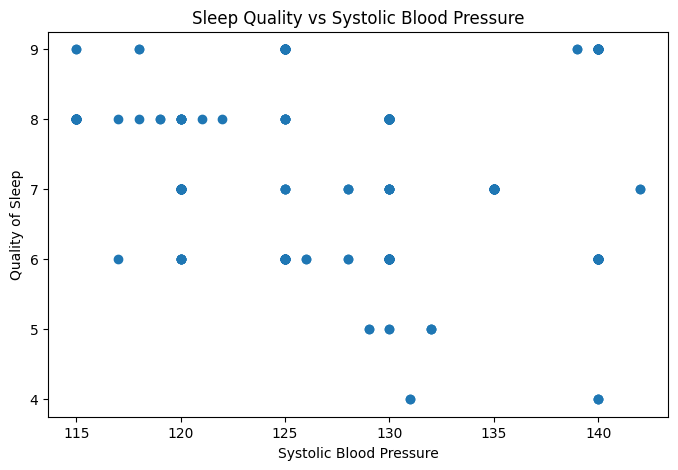

In [56]:
# Blood Pressure as a Health Indicator

# Split "Blood Pressure" into Systolic and Diastolic columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

# Plotting
plt.figure(figsize=(8,5))
plt.scatter(df['Systolic'], df['Quality of Sleep'])
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Quality of Sleep")
plt.title("Sleep Quality vs Systolic Blood Pressure")
plt.show()

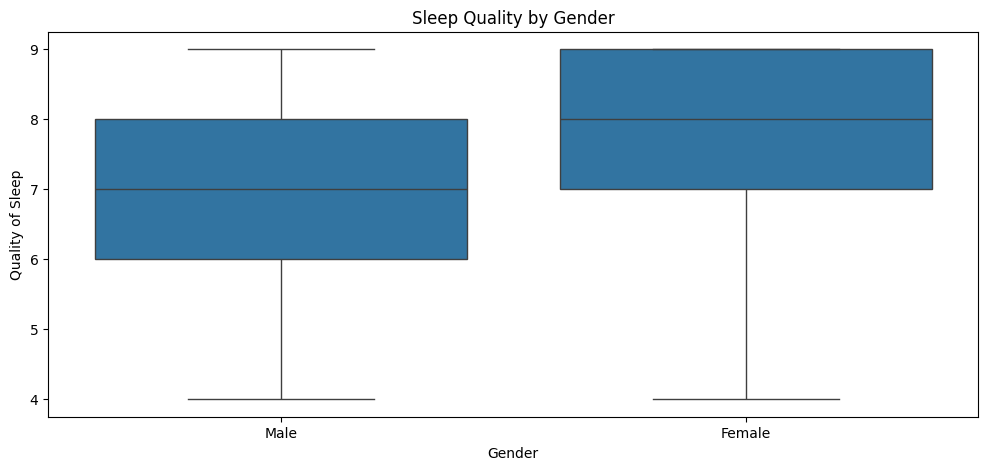

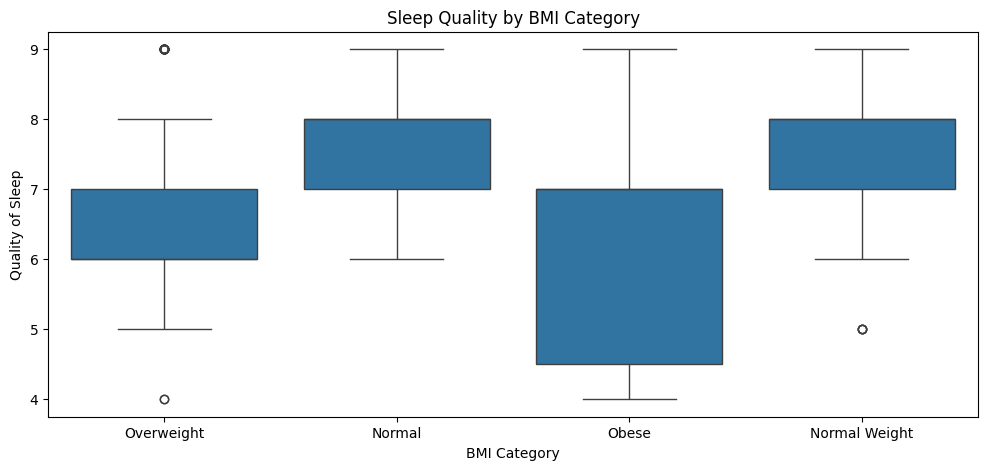

In [57]:
# Plotting Box Plots for Categorical Lifestyle Habits
categorical_habits = ['Gender','BMI Category']

for i, col in enumerate(categorical_habits, 1):
    plt.figure(figsize=(12,5))
    sns.boxplot(data=df, x=col, y='Quality of Sleep')
    plt.title(f"Sleep Quality by {col}")
    plt.show()

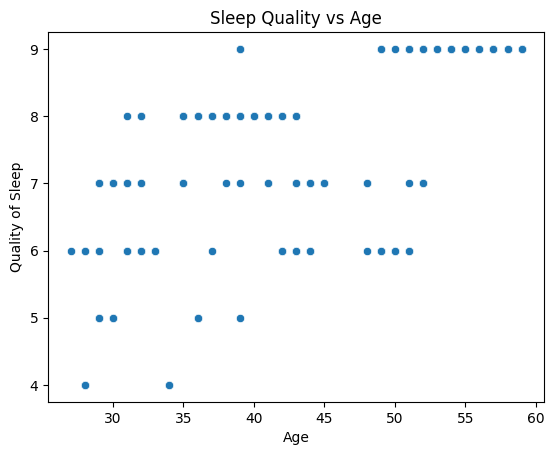

In [58]:
# Scatter Plot for Age
sns.scatterplot(data=df, x='Age', y='Quality of Sleep')
plt.title("Sleep Quality vs Age")
plt.show()


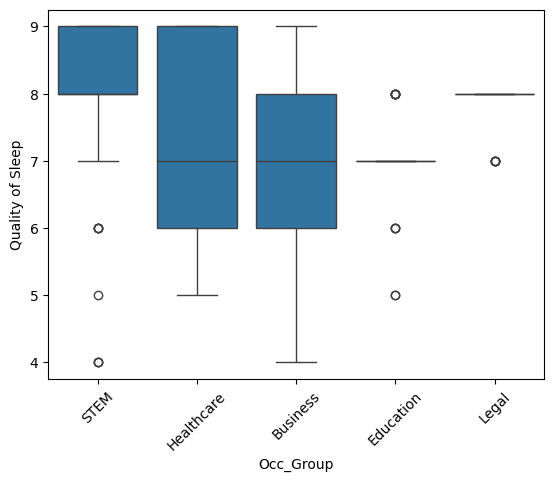

In [59]:
# Box Plot for Occupation Categories

# Grouping occupations into categories for better plot visibility
df['Occ_Group'] = df['Occupation'].replace({
    'Doctor': 'Healthcare',
    'Nurse': 'Healthcare',
    'Scientist': 'STEM',
    'Engineer': 'STEM',
    'Software Engineer': 'STEM',
    'Teacher': 'Education',
    'Salesperson': 'Business',
    'Sales Representative': 'Business',
    'Accountant': 'Business',
    'Manager': 'Business',
    'Lawyer': 'Legal'
})

# Plotting
sns.boxplot(data=df, x='Occ_Group', y='Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

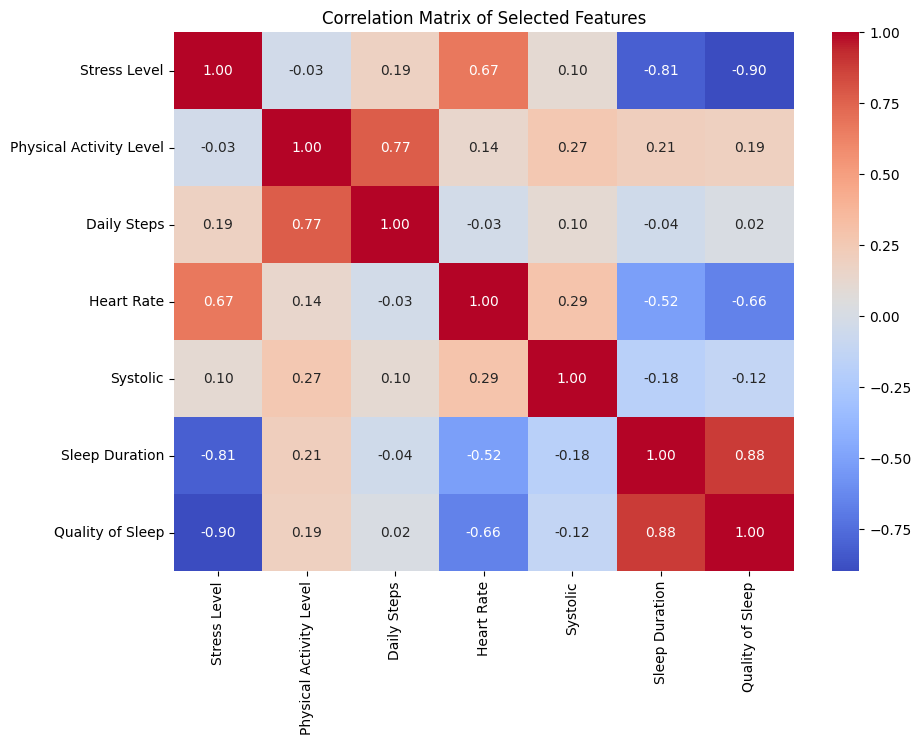

In [60]:
# Correlation Heatmap for lifestyle habits and some heath indicator variables
# Correlation Heatmap for lifestyle habits and health indicator variables
feautures = [
    'Stress Level',
    'Physical Activity Level',
    'Daily Steps',
    'Heart Rate',
    'Systolic',
    'Sleep Duration',
    'Quality of Sleep'
]

numeric_df = df[feautures]

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

**PREDICTIVE MODEL: SIMPLE LINEAR REGRESSION**


**QUESTION: WHICH LIFESTYLE HABITS MOST STRONGLY PREDICT SLEEP QUALITY?**

In [61]:
# Selecting Features For Modeling

features = ['Physical Activity Level', 'Daily Steps', 'Stress Level','Systolic', 'Sleep Duration','Heart Rate']

X = df[features]
y = df['Quality of Sleep']

In [62]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
coef_df

Linear Regression Results:
R² Score: 0.906316260994345
MSE: 0.14133337052479783


,Feature,Coefficient
0,Physical Activity Level,-0.000672
1,Daily Steps,0.000101
2,Stress Level,-0.355713
3,Systolic,0.003417
4,Sleep Duration,0.669910
5,Heart Rate,-0.017772


**RANDOM FOREST MODEL FOR FEAUTURE IMPORTANCE**

In [64]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances

,Feature,Importance
4,Sleep Duration,0.801758
2,Stress Level,0.135553
5,Heart Rate,0.036232
1,Daily Steps,0.013683
3,Systolic,0.009679
0,Physical Activity Level,0.003096


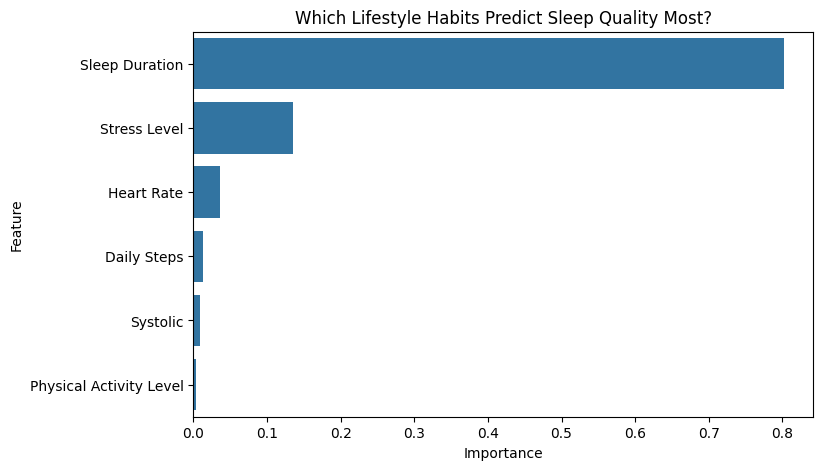

In [65]:
# Plotting Feauture Importance
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x="Importance", y="Feature")
plt.title("Which Lifestyle Habits Predict Sleep Quality Most?")
plt.show()